In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
ds=pd.read_csv(r"D:\model-20210423T165701Z-001\model\dataset\house.csv")
ds

,id,price,sqft_living,bedrooms,bathrooms,year_built,zipcode,address,Latitude,Longitude
0,1,1249000.0,6209.0,5,5.0,1986,80111,"Centennial, CO 80111",39.616672,-104.874651
1,2,220000.0,1422.0,5,4.0,1986,80111,"Centennial, CO 80111",39.616672,-104.874651
2,3,1250000.0,5614.0,2,3.0,1981,80111,"Greenwood Village, CO 80111",39.616672,-104.874651
3,4,599900.0,2785.0,4,3.0,1982,80111,"Englewood, CO 80111",39.616672,-104.874651
4,5,986950.0,3449.0,6,4.0,2019,80111,"Centennial, CO 80111",39.616672,-104.874651
...,...,...,...,...,...,...,...,...,...,...
61,62,1470000.0,5292.0,5,4.0,1981,80111,"Greenwood Village, CO 80111",39.616672,-104.874651
62,63,661559.0,3049.0,4,4.0,2018,80111,"Centennial, CO 80111",39.616672,-104.874651
63,64,715000.0,3593.0,5,3.0,1977,80111,"Greenwood Village, CO 80111",39.616672,-104.874651
64,65,524900.0,2334.0,4,3.0,1978,80111,"Englewood, CO 80111",39.616672,-104.874651


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           66 non-null     int64  
 1   price        66 non-null     float64
 2   sqft_living  66 non-null     float64
 3   bedrooms     66 non-null     int64  
 4   bathrooms    66 non-null     float64
 5   year_built   66 non-null     int64  
 6   zipcode      66 non-null     int64  
 7   address      66 non-null     object 
 8   Latitude     66 non-null     float64
 9   Longitude    66 non-null     float64
dtypes: float64(5), int64(4), object(1)
memory usage: 5.3+ KB


In [4]:
ds.isnull().sum()

id             0
price          0
sqft_living    0
bedrooms       0
bathrooms      0
year_built     0
zipcode        0
address        0
Latitude       0
Longitude      0
dtype: int64

In [5]:
add_enc=LabelEncoder()
Add=pd.DataFrame(add_enc.fit_transform(ds['address']))

In [6]:
Add

,0
0,0
1,0
2,3
3,2
4,0
...,...
61,3
62,0
63,3
64,2


In [7]:
Add.rename({0:'Add_enc'},axis=1,inplace=True)

In [8]:
Add

,Add_enc
0,0
1,0
2,3
3,2
4,0
...,...
61,3
62,0
63,3
64,2


In [9]:
ds.drop(['address','zipcode','Latitude','Longitude'],axis=1,inplace=True)

In [10]:
ds

,id,price,sqft_living,bedrooms,bathrooms,year_built
0,1,1249000.0,6209.0,5,5.0,1986
1,2,220000.0,1422.0,5,4.0,1986
2,3,1250000.0,5614.0,2,3.0,1981
3,4,599900.0,2785.0,4,3.0,1982
4,5,986950.0,3449.0,6,4.0,2019
...,...,...,...,...,...,...
61,62,1470000.0,5292.0,5,4.0,1981
62,63,661559.0,3049.0,4,4.0,2018
63,64,715000.0,3593.0,5,3.0,1977
64,65,524900.0,2334.0,4,3.0,1978


In [11]:
conc=pd.concat([ds,Add],axis=1)
conc

,id,price,sqft_living,bedrooms,bathrooms,year_built,Add_enc
0,1,1249000.0,6209.0,5,5.0,1986,0
1,2,220000.0,1422.0,5,4.0,1986,0
2,3,1250000.0,5614.0,2,3.0,1981,3
3,4,599900.0,2785.0,4,3.0,1982,2
4,5,986950.0,3449.0,6,4.0,2019,0
...,...,...,...,...,...,...,...
61,62,1470000.0,5292.0,5,4.0,1981,3
62,63,661559.0,3049.0,4,4.0,2018,0
63,64,715000.0,3593.0,5,3.0,1977,3
64,65,524900.0,2334.0,4,3.0,1978,2


In [12]:
conc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           66 non-null     int64  
 1   price        66 non-null     float64
 2   sqft_living  66 non-null     float64
 3   bedrooms     66 non-null     int64  
 4   bathrooms    66 non-null     float64
 5   year_built   66 non-null     int64  
 6   Add_enc      66 non-null     int32  
dtypes: float64(3), int32(1), int64(3)
memory usage: 3.5 KB


In [13]:
conc.corr()

,id,price,sqft_living,bedrooms,bathrooms,year_built,Add_enc
id,1.000000,0.117567,0.095296,0.023677,0.107689,0.147053,-0.057251
price,0.117567,1.000000,0.220829,0.155988,0.522116,0.287561,0.076048
sqft_living,0.095296,0.220829,1.000000,-0.005995,0.276911,0.156735,-0.135464
bedrooms,0.023677,0.155988,-0.005995,1.000000,0.654025,-0.059685,-0.363283
bathrooms,0.107689,0.522116,0.276911,0.654025,1.000000,0.168618,-0.262011
year_built,0.147053,0.287561,0.156735,-0.059685,0.168618,1.000000,-0.417791
Add_enc,-0.057251,0.076048,-0.135464,-0.363283,-0.262011,-0.417791,1.000000


<AxesSubplot:>

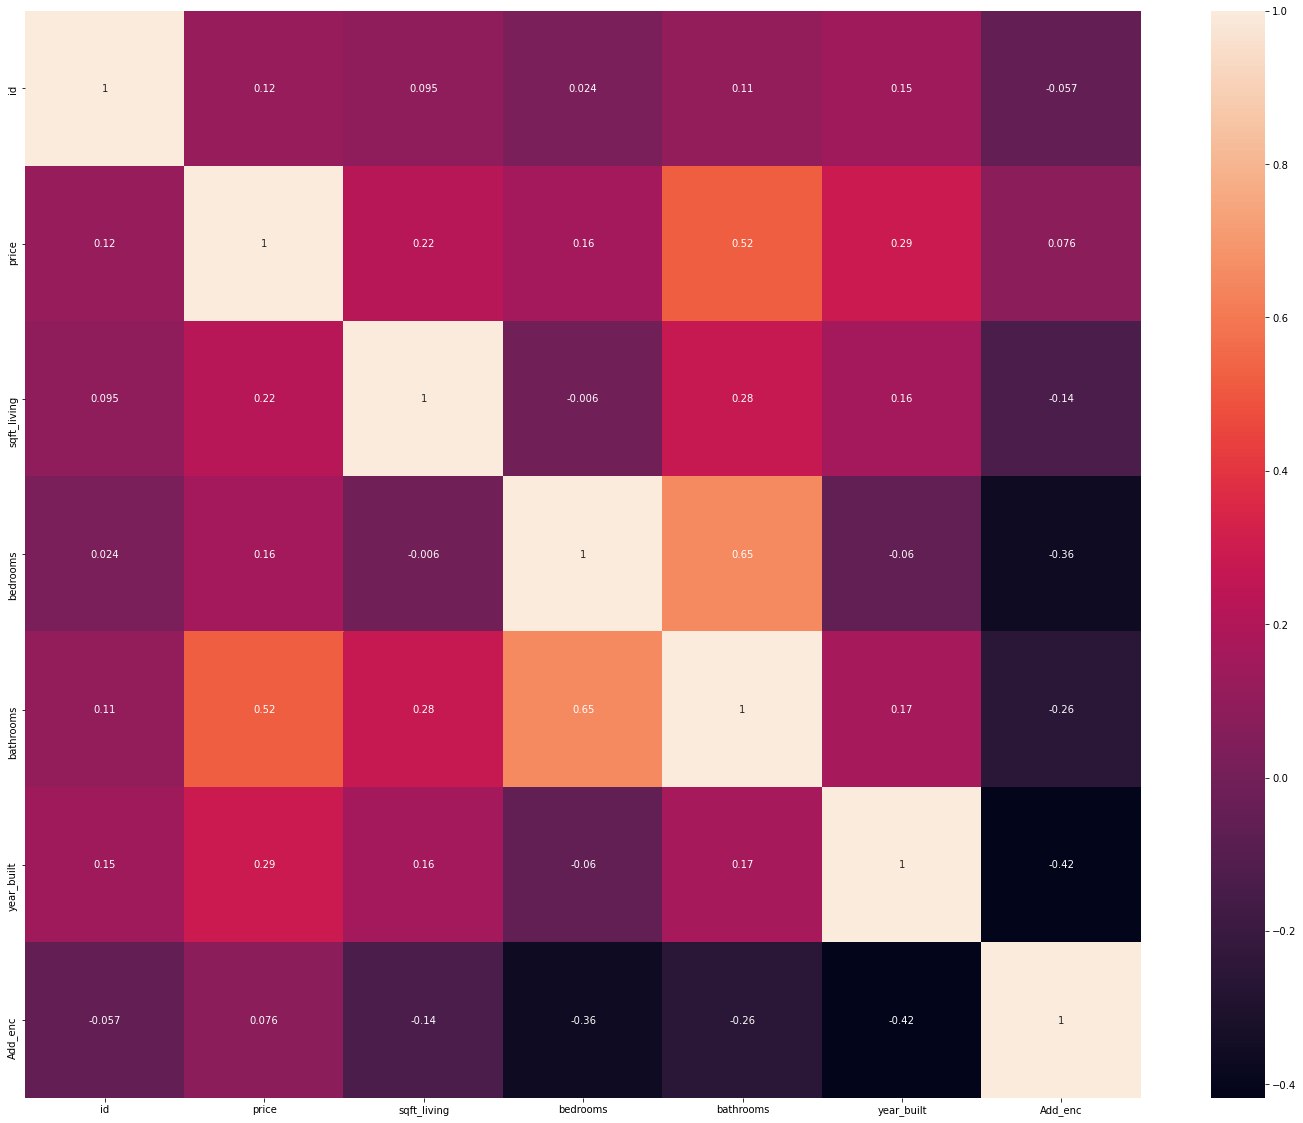

In [14]:
plt.figure(figsize=(25,20))
sns.heatmap(conc.corr(),annot=True)

In [15]:
y=conc[['price']]
x=conc.drop('price',axis=1)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [17]:
model=LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred=model.predict(x_test)

In [20]:
y_test.head()

,price
46,238000.0
57,999800.0
47,599555.0
2,1250000.0
38,1024950.0


In [21]:
y_pred[0:5]

array([[483480.46900112],
       [977071.96518697],
       [806644.99132132],
       [729750.27481079],
       [563063.26197803]])

In [22]:
r2=r2_score(y_test,y_pred)
r2*100

37.038580955752586

In [23]:
y_test_predict=model.predict(x_train)

In [24]:
r=r2_score(y_train,y_test_predict)
r*100

38.057613036486195

In [25]:
mse=mean_squared_error(y_test,y_pred)
mse

155568932906.03177

In [26]:
intercept=model.intercept_
print('intercept is ',intercept)

intercept is  [-6065814.06026577]
